In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def maximum_likelihood_state_estimation(likelihood_data, resolution=1e3):
    """
        This function returns the most likely state projection (number between 0 and 1)
        for a given set of state likelihoods, that is, tuples of probabilities for
        state 0 and 1. This method yields a higher state differentiation than a simple
        mean, and was adapted from Sandeep's StateAnalyser code.
    """
    n_points = len(likelihood_data)
    
    print "Number of points:", n_points
    
    projections = np.arange(resolution) / resolution # Pr(\phi) # np.arange(resolution + 1)
    up_projection, down_projection = projections, 1 - projections
    
    print "up_projection:", up_projection
    print "down_projection", down_projection
    
    most_likely_projections = np.zeros(n_points)
    error_bars = np.zeros((2, n_points))
    
    for i in range(n_points):
        print
        print "----next sequence----"
        
        prob_down = likelihood_data[i, :, 0][:, np.newaxis] # P(0 | data) this comes from the classifier
        prob_up = likelihood_data[i, :, 1][:, np.newaxis] # P(1 | data)
        state_likelihood = np.prod(
            prob_down * down_projection + prob_up * up_projection, axis=0)
        
        print "state_likelihood (before norm)", state_likelihood
        state_likelihood /= np.sum(state_likelihood)
        
        
        print "state_likelihood (after norm)", state_likelihood
        
        # \Pi_r P_r(0 | data) * P(0 | \phi) + P_r(1 | data) * P(1 | \phi) = P((1|\phi) | data)
        # r - set of repetitions for a single experiment

        #weighted mean to find the most likely state.
        most_likely_projections[i] = np.dot(state_likelihood, up_projection)
        
        print "most_likely_projections", most_likely_projections

        # Calculate the error bars
        cumulative_prob = np.cumsum(state_likelihood)
        confidence_interval = 0.682
        #lower errorbar
        #error_bars[0, i] = (
        # most_likely_projections[i] - interp_errorbar((1 - confidence_interval)/2, cumulative_prob)
        # / resolution
        #)
        #upper errorbar             
        #error_bars[1, i] = (
        # interp_errorbar((1 + confidence_interval)/2, cumulative_prob)
        # / resolution - most_likely_projections[i]
        #)
    return (most_likely_projections, error_bars)

In [3]:
likelihood_data = np.zeros([1,1,2])

In [4]:
likelihood_data[:, :, 0] = 0.01
likelihood_data[:, :, 1] = 0.99

In [5]:
result = maximum_likelihood_state_estimation(likelihood_data, resolution=2.)

Number of points: 1
up_projection: [ 0.   0.5]
down_projection [ 1.   0.5]

----next sequence----
state_likelihood (before norm) [ 0.01  0.5 ]
state_likelihood (after norm) [ 0.01960784  0.98039216]
most_likely_projections [ 0.49019608]


In [31]:
prob_up = np.asarray([0.9])[:, np.newaxis] 
prob_down = np.asarray([0.1])[:, np.newaxis]
print prob_up * np.asarray([1, 0.5, 0])
print prob_down  * np.asarray([0, 0.5, 1])
print
print prob_up * np.asarray([1, 0.5, 0]) + prob_down  * np.asarray([0, 0.5, 1])
print
print np.prod(prob_up * np.asarray([1, 0.5, 0]) + prob_down  * np.asarray([0, 0.5, 1]), axis=0)

state_likelihood = np.prod(prob_up * np.asarray([1, 0.5, 0]) + prob_down  * np.asarray([0, 0.5, 1]), axis=0)
state_likelihood /= np.sum(state_likelihood)

print state_likelihood

[[ 0.9   0.45  0.  ]]
[[ 0.    0.05  0.1 ]]

[[ 0.9  0.5  0.1]]

[ 0.9  0.5  0.1]
[ 0.6         0.33333333  0.06666667]


In [49]:
prob_up = np.asarray([0.9]*2)[:, np.newaxis] 
prob_down = np.asarray([0.1]*2)[:, np.newaxis]
print prob_down * np.asarray([1, 0.5, 0])
print prob_up * np.asarray([0, 0.5, 1])
print
print prob_down * np.asarray([1, 0.5, 0]) + prob_up * np.asarray([0, 0.5, 1])
print
print np.prod(prob_down * np.asarray([1, 0.5, 0]) + prob_up  * np.asarray([0, 0.5, 1]), axis=0)

state_likelihood = np.prod(prob_down * np.asarray([1, 0.5, 0]) + prob_up  * np.asarray([0, 0.5, 1]), axis=0)
state_likelihood /= np.sum(state_likelihood)

print state_likelihood

[[ 0.1   0.05  0.  ]
 [ 0.1   0.05  0.  ]]
[[ 0.    0.45  0.9 ]
 [ 0.    0.45  0.9 ]]

[[ 0.1  0.5  0.9]
 [ 0.1  0.5  0.9]]

[ 0.01  0.25  0.81]
[ 0.00934579  0.23364486  0.75700935]


/home/riddhisw/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


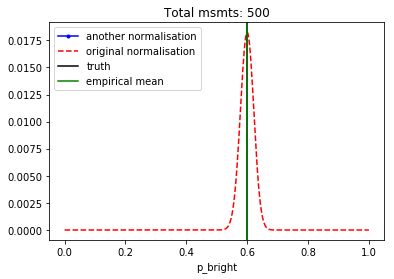

In [208]:
for repts in [100]:
    
    resoln = 1001
    truth =  0.6
    data = [0.0, 0.0, 1.0, 1.0, 1.0]*repts
    
    # 
    prob_up = np.asarray(data)[:, np.newaxis] # output of the classifier 
    prob_down = 1.0 - prob_up # both outputs from classifier always add to one
    
    shots = [np.random.binomial(n=1, p=data[idx]) for idx in range(len(data))]
    empirical_mean = np.mean(shots)

    project_up = np.linspace(0, 1, resoln)
    project_down = (1.0 - project_up)
#     print "first element:", prob_up * project_up
#     print "second element:", prob_down  * project_down
#     print
    total_elements = prob_up * project_up + prob_down * project_down
#     print "first + second element:", total_elements
#     print
    normalisers = 1.0 / np.sum(total_elements, axis=1)
    # print "sum of each posterior per rep:", 1.0/ normalisers
    # print 
    norm_total_elements = [normalisers[idx] * total_elements[idx] for idx in range(len(data))]
#     print "norm_total_elements", norm_total_elements
#     print "each element of norm_total_elements is a prob dist", np.sum(norm_total_elements, axis=1)
    # print
#     print "product over total_elements", np.prod(total_elements, axis=0)
    # print
#     print "product over norm_total_elements", np.prod(norm_total_elements, axis=0)
    state_likelihood_new = np.prod(norm_total_elements, axis=0)
    state_likelihood_new /= np.sum(state_likelihood_new)
    state_likelihood_old = np.prod(total_elements, axis=0)
    state_likelihood_old /= np.sum(state_likelihood_old)


    plt.figure()
    plt.title('Total msmts: %s' %(len(data)))
    plt.xlabel('p_bright')
    plt.plot(project_up, state_likelihood_new, 'b.-', label='another normalisation')
    plt.plot(project_up, state_likelihood_old, 'r--', label='original normalisation')
    plt.axvline(x=truth, c='k', label='truth')
    plt.axvline(x=empirical_mean, c='g', label='empirical mean')
    plt.legend(loc=0)
    plt.show()